This is a jupyter notebook on convolutions. The topics covered are:

    How to convolve two discrete sets of variables
    How to convolve two functions
    The uses of convolution

First, let's define convolution:

Convolution refers both to the function produced out of two other functions and the process of computing it. The order of the convolution matters, and it can be though of as multiplying two functions.

### Discrete Convolution (for sequences / digital signals)

For two discrete-time sequences $x[n]$ and $h[n]$ (both defined for integer $n$), the convolution $y[n] = (x * h)[n]$ is

$$
\boxed{
y[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n - k]
\qquad \text{(discrete convolution)}
}
$$

In practice (finite support or causal signals) the sum is taken over the overlapping indices only:

$$
y[n] = \sum_{k=\max(0, n-L_h+1)}^{\min(n, L_x-1)} x[k] \, h[n-k]
$$

where $L_x$ and $L_h$ are the lengths of $x$ and $h$.

### Continuous Convolution (for functions / analog signals)

For two continuous-time functions $x(t)$ and $h(t)$, the convolution $(x * h)(t)$ is defined as the integral

$$
\boxed{
(x * h)(t) = \int_{-\infty}^{\infty} x(\tau) \, h(t - \tau) \, d\tau
\qquad \text{(continuous convolution)}
}
$$

Equivalently (by substitution $\lambda = t - \tau$):

$$
(x * h)(t) = \int_{-\infty}^{\infty} x(t - \lambda) \, h(\lambda) \, d\lambda
$$

For functions that are supported from [0, infinity) i.e. are zero when their argument is less than 0 the convolution simplifies to:

$$
(x * h)(t) = \int_{0}^{t} x(\tau) \, h(t - \tau) \, d\tau
$$

### Side-by-side comparison

$$
\begin{array}{c|c}
\text{Discrete} & \text{Continuous} \\ \hline
\begin{array}{c}
y[n] = \\
\sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
\end{array}
&
\begin{array}{c}
(y(t) = \\
\int_{-\infty}^{\infty} x(\tau) \, h(t-\tau) \, d\tau
\end{array}
\\[20pt] \hline
\text{sum over } k \in \mathbb{Z} & \text{integral over } \tau \in \mathbb{R} \\
\text{index shift } n-k & \text{time shift } t-\tau \\
\end{array}
$$

In [31]:
import math

def capacitor_charge(t, R=1, C=1):
    try:
        return math.exp(-t/(R*C))
    except:
        return 0

def voltage(t):
    if (t < 5.0 and t > 0.0):
        return 5
    else:
        return 0

### Exercise 1: Using continuous convolution to visualise the charge, discharge of a capacitor

In the above code, the function for a capacitors charging is given. We also have the function for the voltage applied accross it over time. Fill in the convolution function in the next block to plot the charge accross the capacitor as a function of time.

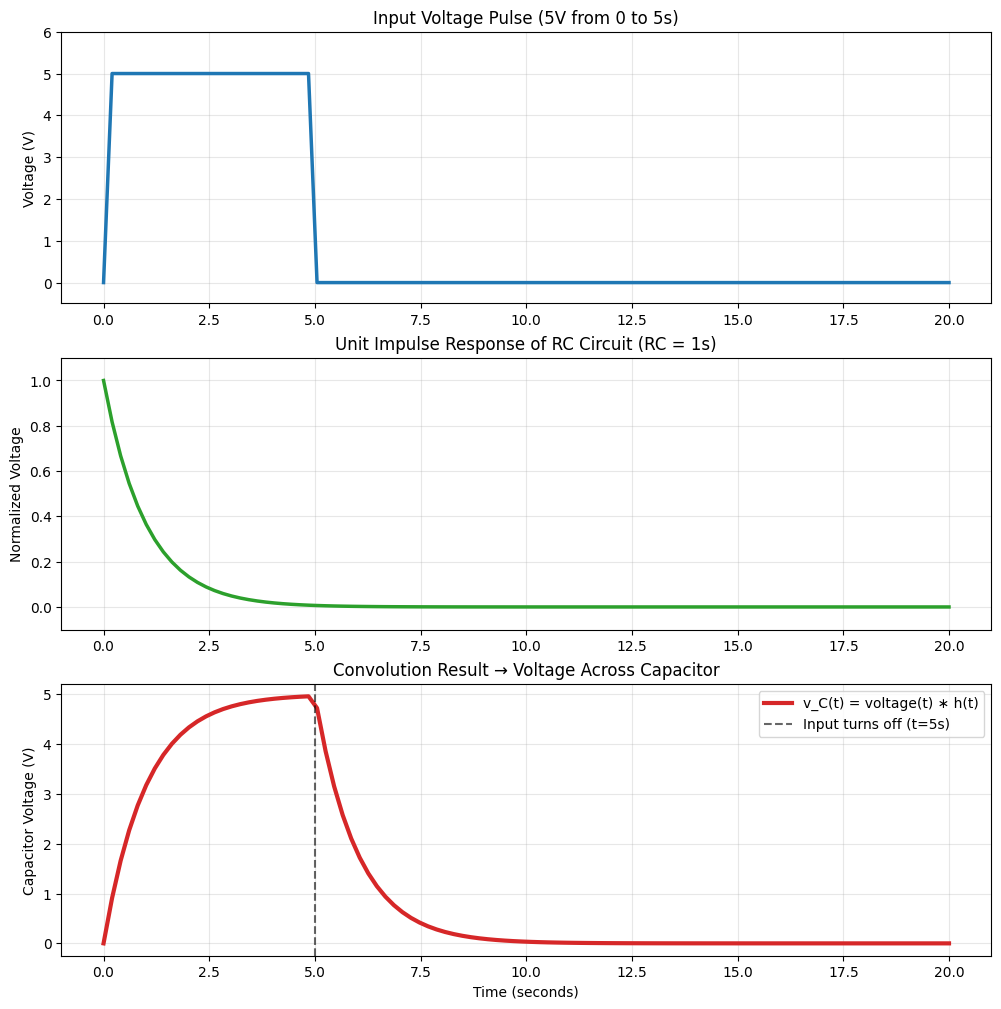

At t = 0⁺     → v_C = 0.000000 V
At t = 5s     → v_C ≈ 4.7193 V  (charging ends)
At t = 10s    → v_C ≈ 0.0370 V  (during discharge)
Peak voltage  → 4.9559 V
Theoretical peak at t=5s: 5*(1 - exp(-5)) ≈ 4.9663 V


In [34]:
def integral(x, start, end, stepSize=0.001):
    steps = (end - start) / stepSize
    integral = [0]
    for i in range(1, steps):
        integral.append(x(start + i * stepSize) * stepSize + integral[-1])
    return integral

def convolve(f, g, t, stepSize = 0.001):
    ### Code here to convolve f and g. 
    if (t < 0): 
        return 0.0
    
    start = 0
    end = t
    steps = int((end - start) / stepSize)
    integral = 0.0
    
    for i in range(1, steps):
        tau = i * stepSize + start
        integral += stepSize * (f(tau) * g(t - tau))
        
    ### Hint: study first how to integrate a function in python, and then use the formula for continuous convolution above
    return integral

import matplotlib.pyplot as plt
import numpy as np

steps = int(100)
t_values = np.linspace(0, 20, steps)
v_in = [voltage(t) for t in t_values]
h_t  = [capacitor_charge(t) for t in t_values]
v_out = [convolve(voltage, capacitor_charge, t) for t in t_values]
# precision=2e-6 gives excellent accuracy with reasonable speed

# === Plotting (updated to work with scalar output) ===
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(t_values, v_in, label='Input voltage(t)', color='tab:blue', linewidth=2.5)
plt.title('Input Voltage Pulse (5V from 0 to 5s)')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 6)

plt.subplot(3, 1, 2)
plt.plot(t_values, h_t, label='Step Response h(t) = 1 - e^{-t/RC}', color='tab:green', linewidth=2.5)
plt.title('Unit Impulse Response of RC Circuit (RC = 1s)')
plt.ylabel('Normalized Voltage')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.subplot(3, 1, 3)
plt.plot(t_values, v_out, label='v_C(t) = voltage(t) ∗ h(t)', color='tab:red', linewidth=3)
plt.title('Convolution Result → Voltage Across Capacitor')
plt.xlabel('Time (seconds)')
plt.ylabel('Capacitor Voltage (V)')
plt.grid(True, alpha=0.3)

# Mark key points
plt.axvline(5, color='black', linestyle='--', alpha=0.6, label='Input turns off (t=5s)')
plt.legend()
plt.show()

# === Print meaningful results ===
idx5  = np.argmin(np.abs(t_values - 5.0))
idx10 = np.argmin(np.abs(t_values - 10.0))

print(f"At t = 0⁺     → v_C = {v_out[0]:.6f} V")
print(f"At t = 5s     → v_C ≈ {v_out[idx5]:.4f} V  (charging ends)")
print(f"At t = 10s    → v_C ≈ {v_out[idx10]:.4f} V  (during discharge)")
print(f"Peak voltage  → {max(v_out):.4f} V")
print(f"Theoretical peak at t=5s: 5*(1 - exp(-5)) ≈ {5*(1-math.exp(-5)):.4f} V")